<a href="https://colab.research.google.com/github/hcalldee/Penelitian_bidan_halimah/blob/main/Penelitian_Mba_Halimah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install researchpy
import math
import pandas as pd
import numpy as np
import researchpy as rp
from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import kstest
from scipy.stats import wilcoxon
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
url = 'https://raw.githubusercontent.com/hcalldee/Penelitian_bidan_halimah/main/dataset_mbahalimah3.csv'
dataset = pd.read_csv(url,sep=',')
df = dataset.iloc[:,1:11]
df

,INISIAL,UMUR,UK,PARITAS,PENDIDIKAN,PEKERJAAN,SKOR PRETES,nilai pretest,SKOR POSTEST,nilai Postest
0,NY. MY,21-30,TRIMESTER 2,PRIMIGRAVIDA,TINGGI,BEKERJA,CEMAS SEDANG,25,CEMAS RINGAN,16
1,NY.MS,21-30,TRIMESTER 2,PRIMIGRAVIDA,TINGGI,BEKERJA,CEMAS SEDANG,23,CEMAS RINGAN,18
2,NY.S,21-30,TRIMESTER 2,PRIMIGRAVIDA,TINGGI,TIDAK BEKERJA,CEMAS SEDANG,24,TIDAK CEMAS,14
3,NY.R,31-45,TRIMESTER 3,MULTIGRAVIDA,TINGGI,BEKERJA,CEMAS SEDANG,24,CEMAS SEDANG,21
4,NY.C,21-30,TRIMESTER 3,PRIMIGRAVIDA,TINGGI,TIDAK BEKERJA,CEMAS RINGAN,18,CEMAS RINGAN,15
5,NY A,31-45,TRIMESTER 3,MULTIGRAVIDA,TINGGI,BEKERJA,CEMAS RINGAN,16,CEMAS RINGAN,18
6,NY.R,21-30,TRIMESTER 3,MULTIGRAVIDA,RENDAH,TIDAK BEKERJA,CEMAS SEDANG,24,TIDAK CEMAS,14
7,NY.N,21-30,TRIMESTER 3,MULTIGRAVIDA,RENDAH,TIDAK BEKERJA,CEMAS SEDANG,22,CEMAS RINGAN,17
8,NY. W,31-45,TRIMESTER 2,MULTIGRAVIDA,TINGGI,TIDAK BEKERJA,CEMAS SEDANG,23,CEMAS RINGAN,18
9,NY.J,21-30,TRIMESTER 3,PRIMIGRAVIDA,TINGGI,TIDAK BEKERJA,CEMAS RINGAN,17,CEMAS RINGAN,17


In [49]:
df.columns

Index(['INISIAL ', 'UMUR', 'UK', 'PARITAS', 'PENDIDIKAN', 'PEKERJAAN',
       'SKOR PRETES', 'nilai pretest', 'SKOR POSTEST', 'nilai Postest'],
      dtype='object')

In [34]:
# # pakai salah satu
# # normalisasi data logaritmik
# df['nilai pretest'] = np.log10(df['nilai pretest'])
# df['nilai Postest'] = np.log10(df['nilai Postest'])

# # normalisasi data squareroot
# df['nilai pretest'] = np.sqrt(df['nilai pretest'])
# df['nilai Postest'] = np.sqrt(df['nilai Postest'])

Q-Q plot nilai pretest 



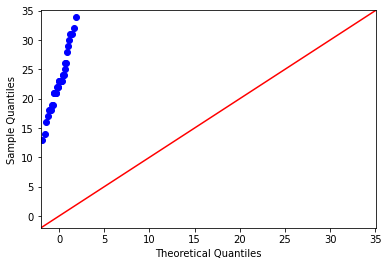



Q-Q plot nilai posttest 



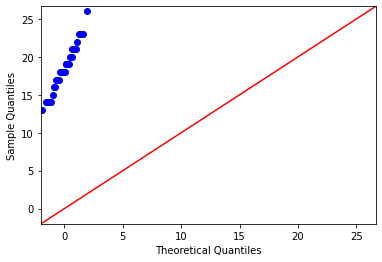



DESKRIPSI STATISTIK 

       nilai pretest  nilai Postest
count      36.000000      36.000000
mean       22.916667      18.500000
std         4.959119       2.971291
min        13.000000      13.000000
25%        20.500000      17.000000
50%        23.000000      18.000000
75%        25.250000      20.250000
max        34.000000      26.000000


Uji Normality Saphiro

nilai pretest terdistribusi Normal dengan nilai 0.4408668875694275

nilai Postest terdistribusi Normal dengan nilai 0.48050588369369507

Uji Normality Kolmogorov-Smirnov

nilai pretest tidak terdistribusi Normal dengan nilai 0.0

nilai Postest tidak terdistribusi Normal 0.0


Uji wilcoxon

nilai hasi uji : 0.00000627



Uji T-Test Paired Variable

population mean of hasil pretest isn't equal to hasil postest
pretest value : 4.583881365099853 postest value : 1.9405198693136327e-05


Uji T-Test Independent Variable




FREKUENSI

      21-30  31-45
UMUR     25     11


    TRIMESTER 3  TRIMESTER 2
UK           20         

In [51]:
# frekuensi = pd.dataFrame()
frek = []
df.columns
n=0




print("Q-Q plot nilai pretest \n")
fig = sm.qqplot(df.iloc[:,7], line='45')
plt.show()
print('\n')

print("Q-Q plot nilai posttest \n")
fig = sm.qqplot(df.iloc[:,9], line='45')
plt.show()
print('\n')

print("DESKRIPSI STATISTIK \n")
print(df.describe())
print('\n')

print('Uji Normality Saphiro\n')
if(shapiro(df.iloc[:,7])[1]>0.05):
  print(str(df.columns[7])+' terdistribusi Normal dengan nilai '+str(shapiro(df.iloc[:,7])[1])+'\n')
elif(shapiro(df.iloc[:,7])[1]<0.05):
  print(str(df.columns[7])+' tidak terdistribusi Normal dengan nilai '+str(shapiro(df.iloc[:,7])[1])+'\n')

if(shapiro(df.iloc[:,9])[1]>0.05):
  print(str(df.columns[9])+' terdistribusi Normal dengan nilai '+str(shapiro(df.iloc[:,9])[1])+'\n')
elif(shapiro(df.iloc[:,9])[1]<0.05):
  print(str(df.columns[9])+' tidak terdistribusi Normal '+str(shapiro(df.iloc[:,9])[1])+'\n')

print('Uji Normality Kolmogorov-Smirnov\n')
if(kstest(df.iloc[:,7],'norm')[1]>0.05):
  print(str(df.columns[7])+' terdistribusi Normal dengan nilai '+str(kstest(df.iloc[:,7],'norm')[1])+'\n')
elif(kstest(df.iloc[:,7],'norm')[1]<0.05):
  print(str(df.columns[7])+' tidak terdistribusi Normal dengan nilai '+str(kstest(df.iloc[:,7],'norm')[1])+'\n')

if(kstest(df.iloc[:,9],'norm')[1]>0.05):
  print(str(df.columns[9])+' terdistribusi Normal dengan nilai '+str(kstest(df.iloc[:,9],'norm')[1])+'\n')
elif(kstest(df.iloc[:,9],'norm')[1]<0.05):
  print(str(df.columns[9])+' tidak terdistribusi Normal '+str(kstest(df.iloc[:,9],'norm')[1])+'\n')

print('\nUji wilcoxon\n')
hasil = stats.wilcoxon(df.iloc[:,7], df.iloc[:,9])
print("nilai hasi uji : "+"{:.8f}".format(float(str(hasil[1]))))
print('\n')

print('\nUji T-Test Paired Variable\n')
hasil = stats.ttest_ind(a=df.iloc[:,7], b=df.iloc[:,9], equal_var=True)
if(hasil[0]==hasil[1]):
  print('population mean of hasil pretest is equal to hasil postest')
  print('pretest value : '+str(hasil[0])+' postest value : '+str(hasil[1]))
elif(hasil[0]!=hasil[1]):
  print('population mean of hasil pretest isn\'t equal to hasil postest')
  print('pretest value : '+str(hasil[0])+' postest value : '+str(hasil[1]))
print('\n')

print('Uji T-Test Independent Variable\n')
hasil = rp.ttest(group1= df.iloc[:,7], group1_name= "nilai pretest",
         group2= df.iloc[:,9], group2_name= "nilai postest")
print('\n')

print("\nFREKUENSI\n")
for i in df.columns:
  if(i != "INISIAL "):
    frek.append(df[i].value_counts())

for dat in frek:
  print(pd.DataFrame(dat).T)
  print('\n')